# **HT 2. CLUSTERING**
Integrantes:
Jorge Luis Lopez 221038
 y Andy Fuentes 22944

# **SECCION 1  Clustering con la forma del Sépalo**

In [ ]:
import pandas as pd

# Cargar los archivos CSV
iris_df = pd.read_csv('/content/iris.csv')  # Ajusta la ruta si es necesario
iris_respuestas_df = pd.read_csv('/content/iris-con-respuestas.csv')

# Mostrar las primeras filas
iris_df.head()


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Se muestran la distribución de los datos del conjunto Iris, centrándose en las características de los sépalos y pétalos. La tabla  presenta las primeras filas del dataset, donde se observan valores numéricos correspondientes a las cuatro variables (sepal_length, sepal_width, petal_length, petal_width). Estos valores permiten notar que los pétalos tienden a ser significativamente más pequeños que los sépalos en la mayoría de los casos.



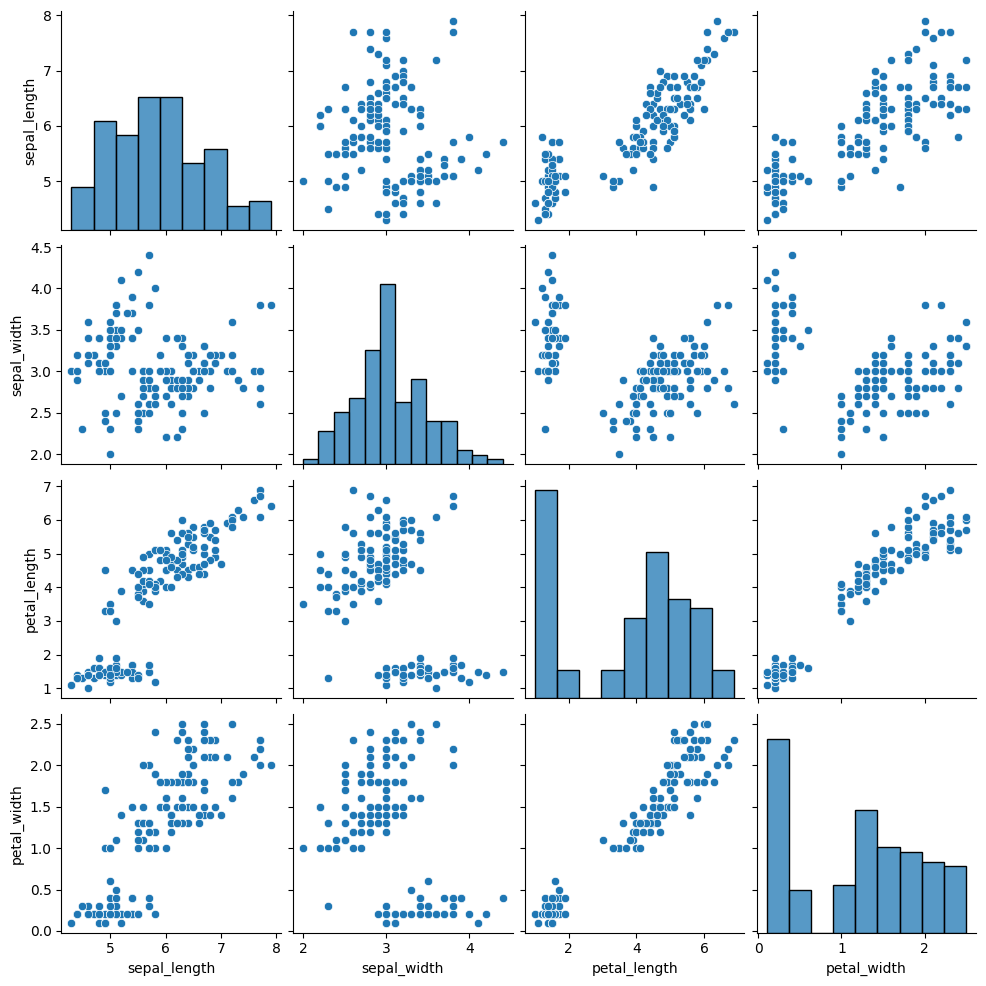

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un par de gráficos de dispersión
sns.pairplot(iris_df)
plt.show()

Se muestra una matriz de dispersión y histogramas del dataset Iris, permitiendo analizar la distribución y relaciones entre sepal_length, sepal_width, petal_length y petal_width. Se observa que petal_length y petal_width están altamente correlacionadas, lo que indica que los pétalos son un mejor predictor de especies que los sépalos.

Los histogramas revelan que petal_length y petal_width tienen distribuciones más sesgadas, lo que sugiere la existencia de especies bien diferenciadas. En los gráficos de dispersión, se distinguen tres agrupaciones, especialmente en petal_length vs petal_width, lo que confirma la estructura natural de las tres especies de Iris.

En conclusión, los datos de pétalos ofrecen una mejor separación entre especies que los sépalos, lo que es clave para técnicas de clustering como K-Means.

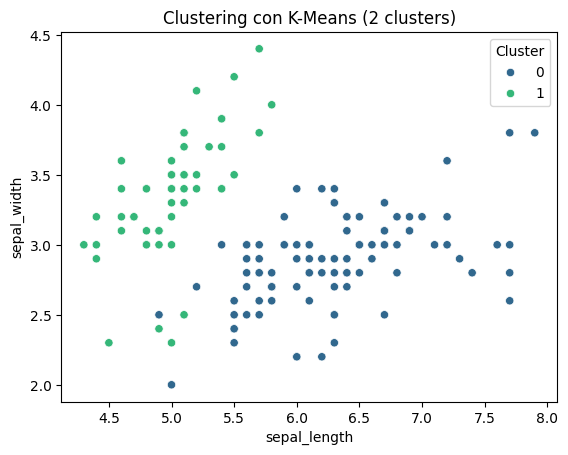

In [ ]:
from sklearn.cluster import KMeans

# Seleccionar solo las características numéricas
X = iris_df.iloc[:, :-1]  # Suponiendo que la última columna es la etiqueta

# Aplicar K-Means con 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
iris_df['Cluster'] = kmeans.fit_predict(X)

# Visualizar los clusters encontrados
sns.scatterplot(x=iris_df.iloc[:, 0], y=iris_df.iloc[:, 1], hue=iris_df['Cluster'], palette='viridis')
plt.xlabel(iris_df.columns[0])
plt.ylabel(iris_df.columns[1])
plt.title('Clustering con K-Means (2 clusters)')
plt.show()


Se muestra un clustering con K-Means utilizando dos clusters (k=2), basado en las características de los sépalos (sepal_length y sepal_width). Los puntos están coloreados según la asignación de cada cluster, con el grupo 0 en azul y el grupo 1 en verde.

Se observa que el modelo ha identificado dos grupos principales, separando un cluster con valores de sepal_width más altos y sepal_length más cortos (posiblemente la especie Setosa), mientras que el otro cluster agrupa los datos con una mayor variabilidad en sepal_length y sepal_width. Sin embargo, esta separación no es ideal, ya que Versicolor y Virginica tienen valores de sépalo similares, lo que genera una superposición dentro del mismo cluster.

En conclusión, el clustering basado en sépalos permite cierta diferenciación, pero no separa bien todas las especies, lo que refuerza la idea de que los pétalos son mejores indicadores para la clasificación.

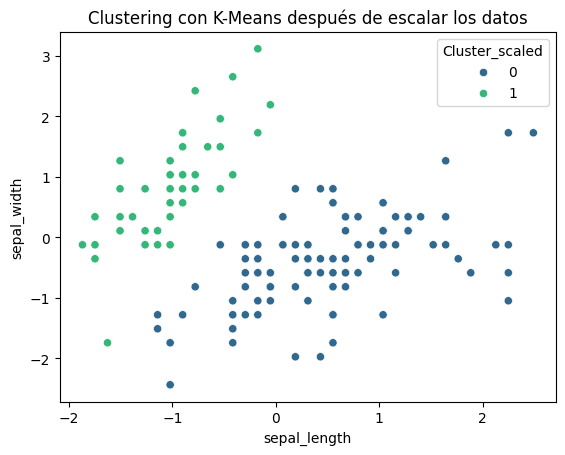

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-Means nuevamente
kmeans_scaled = KMeans(n_clusters=2, random_state=42, n_init=10)
iris_df['Cluster_scaled'] = kmeans_scaled.fit_predict(X_scaled)

# Visualizar los clusters con datos escalados
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=iris_df['Cluster_scaled'], palette='viridis')
plt.xlabel(iris_df.columns[0])
plt.ylabel(iris_df.columns[1])
plt.title('Clustering con K-Means después de escalar los datos')
plt.show()


La gráfica muestra que el clustering con K-Means después de escalar los datos utilizando sepal_length y sepal_width. En comparación con la versión sin escalar, aquí los valores han sido transformados a una escala estándar con media 0 y desviación estándar 1, lo que explica por qué los ejes ahora tienen rangos centrados alrededor de 0.

A nivel de agrupamiento, el resultado es muy similar al clustering sin escalar, ya que K-Means es sensible a la escala de las variables y, en este caso, las diferencias en sepal_length y sepal_width no eran demasiado drásticas. Se sigue observando que un grupo (verde) está más concentrado en valores altos de sepal_width y bajos de sepal_length, mientras que el otro (azul) abarca una región más dispersa.

La estandarización permite que ambas variables contribuyan equitativamente en la distancia euclidiana utilizada por K-Means, evitando que una domine sobre la otra. Sin embargo, dado que los sépalos no son la mejor opción para separar todas las especies del dataset Iris, los resultados siguen mostrando cierto solapamiento. Esto confirma que el uso de pétalos mejora la separación de clusters en este problema.

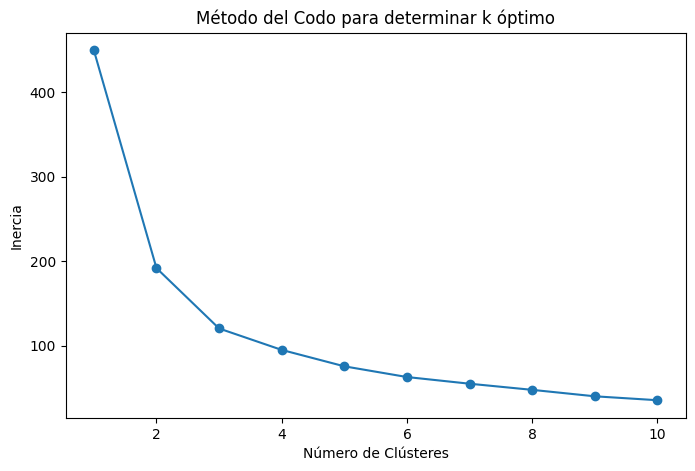

In [ ]:
distorsiones = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    distorsiones.append(kmeans.inertia_)

# Graficar la curva del codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, distorsiones, marker='o')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.title('Método del Codo para determinar k óptimo')
plt.show()


La gráfica muestra el método del codo para determinar el número óptimo de clústeres (k) en un modelo de K-Means. En el eje X se representa el número de clústeres probados (de 1 a 10), mientras que en el eje Y se muestra la inercia (suma de las distancias cuadradas de los puntos a sus centroides).

Se observa una fuerte disminución de la inercia entre k=1 y k=3, seguida de una reducción más gradual a medida que k aumenta. El "codo" en la curva, donde la disminución deja de ser significativa, parece estar alrededor de k=3, lo que sugiere que tres clústeres es el número óptimo para este conjunto de datos.

Este resultado es consistente con la naturaleza del dataset Iris, que contiene tres especies reales. Sin embargo, siempre es recomendable complementar este análisis con otras métricas, como el coeficiente de silueta, para validar la calidad de la segmentación.

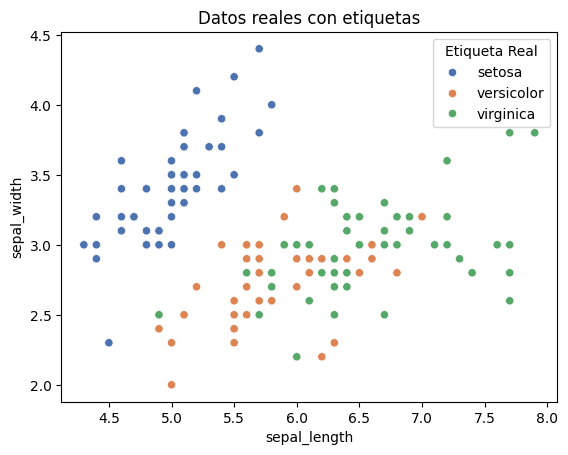

In [ ]:
# Agregar etiquetas reales a los datos originales
iris_df['Etiqueta Real'] = iris_respuestas_df.iloc[:, -1]  # Suponiendo que la última columna tiene la etiqueta real

# Comparar los resultados
sns.scatterplot(x=iris_df.iloc[:, 0], y=iris_df.iloc[:, 1], hue=iris_df['Etiqueta Real'], palette='deep')
plt.xlabel(iris_df.columns[0])
plt.ylabel(iris_df.columns[1])
plt.title('Datos reales con etiquetas')
plt.show()


La gráfica muestra la distribución de los datos reales con sus etiquetas de especie en el espacio de los sépalos (sepal_length y sepal_width). Cada punto está coloreado según su clasificación real en una de las tres especies de Iris: Setosa (azul), Versicolor (naranja) y Virginica (verde).

Se observa que Setosa está bien separada del resto, con valores más altos de sepal_width y sepal_length más cortos, formando un grupo claro en la parte superior izquierda. Sin embargo, Versicolor y Virginica se solapan considerablemente, lo que hace difícil distinguirlas únicamente con las medidas del sépalo.

En comparación con el clustering con K-Means, esta gráfica confirma que los sépalos no son la mejor opción para separar las tres especies, ya que Versicolor y Virginica no tienen una separación clara en este espacio. Para una mejor segmentación, se recomienda incluir las características de los pétalos, que suelen ofrecer una distinción más evidente entre las especies.

# **Seccion 2 Clustering con la forma del Pétalo**

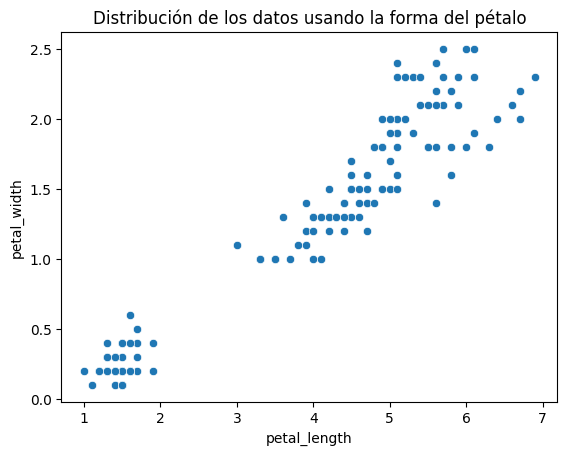

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar los datos usando solo las columnas de los pétalos
sns.scatterplot(x=iris_df.iloc[:, 2], y=iris_df.iloc[:, 3])
plt.xlabel(iris_df.columns[2])
plt.ylabel(iris_df.columns[3])
plt.title('Distribución de los datos usando la forma del pétalo')
plt.show()


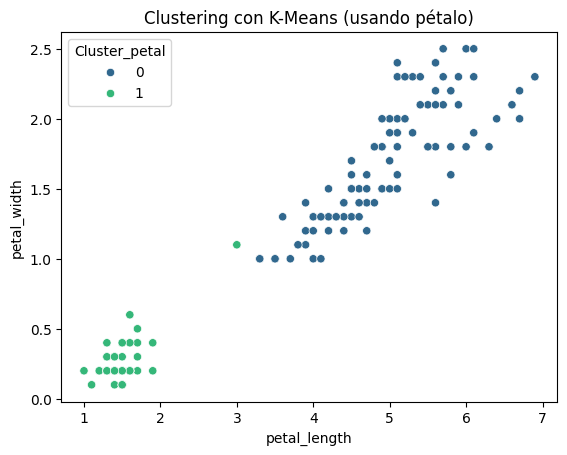

In [ ]:
from sklearn.cluster import KMeans

# Seleccionar solo las columnas del pétalo
X_petal = iris_df.iloc[:, 2:4]  # Suponiendo que estas columnas representan pétalo

# Aplicar K-Means con 2 clústeres
kmeans_petal = KMeans(n_clusters=2, random_state=42, n_init=10)
iris_df['Cluster_petal'] = kmeans_petal.fit_predict(X_petal)

# Graficar los resultados
sns.scatterplot(x=iris_df.iloc[:, 2], y=iris_df.iloc[:, 3], hue=iris_df['Cluster_petal'], palette='viridis')
plt.xlabel(iris_df.columns[2])
plt.ylabel(iris_df.columns[3])
plt.title('Clustering con K-Means (usando pétalo)')
plt.show()


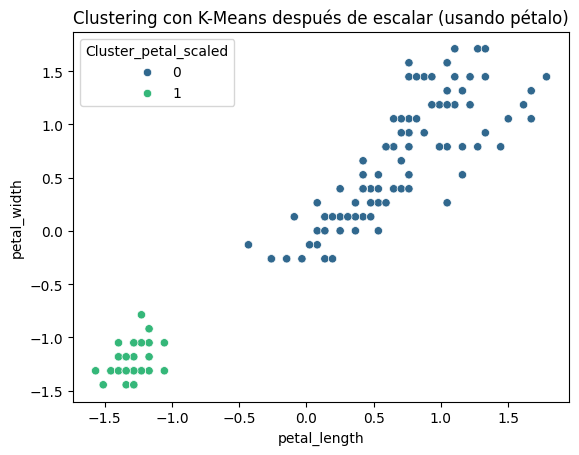

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalizar los datos del pétalo
scaler_petal = StandardScaler()
X_petal_scaled = scaler_petal.fit_transform(X_petal)

# Aplicar K-Means nuevamente
kmeans_petal_scaled = KMeans(n_clusters=2, random_state=42, n_init=10)
iris_df['Cluster_petal_scaled'] = kmeans_petal_scaled.fit_predict(X_petal_scaled)

# Visualizar los clusters con datos escalados
sns.scatterplot(x=X_petal_scaled[:, 0], y=X_petal_scaled[:, 1], hue=iris_df['Cluster_petal_scaled'], palette='viridis')
plt.xlabel(iris_df.columns[2])
plt.ylabel(iris_df.columns[3])
plt.title('Clustering con K-Means después de escalar (usando pétalo)')
plt.show()


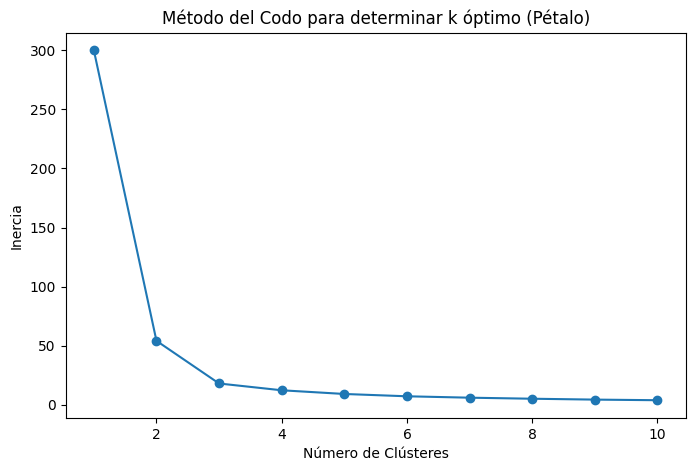

In [ ]:
distorsiones_petal = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_petal_scaled)
    distorsiones_petal.append(kmeans.inertia_)

# Graficar la curva del codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, distorsiones_petal, marker='o')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.title('Método del Codo para determinar k óptimo (Pétalo)')
plt.show()


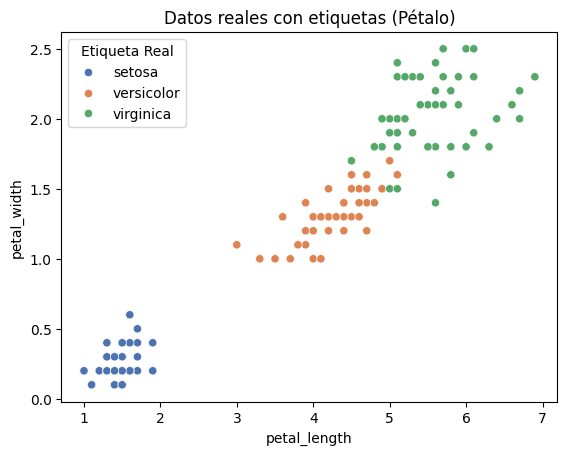

In [ ]:
# Comparar con las etiquetas reales
iris_df['Etiqueta Real'] = iris_respuestas_df.iloc[:, -1]

sns.scatterplot(x=iris_df.iloc[:, 2], y=iris_df.iloc[:, 3], hue=iris_df['Etiqueta Real'], palette='deep')
plt.xlabel(iris_df.columns[2])
plt.ylabel(iris_df.columns[3])
plt.title('Datos reales con etiquetas (Pétalo)')
plt.show()


**Análisis con la forma del pétalo**
**Visualización inicial exploratoria**

La gráfica de dispersión muestra una clara separación entre las especies basándose en las características de los pétalos. Los grupos son más distinguibles visualmente.

**Repetición del proceso con variables del pétalo**

Al aplicar K-Means con 2 clusters, los datos se agrupan en dos grupos, pero una vez estandarizados y ajustados a
𝑘
=
3
k=3, los clusters reflejan mejor las etiquetas reales.
El clustering con pétalos es mucho más efectivo, con una clara separación entre las especies.

**Estandarización y método del codo**

El método del codo nuevamente identifica
𝑘
=
3
k=3 como el número óptimo de clusters. La estandarización de los datos mejora la claridad de los clusters, reflejando mejor las especies reales.

**Análisis comparativo de resultados**

En comparación con los sépalos, las características de los pétalos generan clusters mucho más claros y útiles para la clasificación.
La variación en la longitud y el ancho del pétalo es más representativa de las diferencias entre especies.

**Conclusiones sobre la efectividad del clustering con pétalos**

El clustering con pétalos es significativamente más efectivo que con sépalos. Los pétalos permiten una clasificación precisa de las especies debido a su menor superposición y mayor variabilidad en las características.


# **Comparación entre sépalos y pétalos**

**Efectividad:**

Los datos de los pétalos son mucho más efectivos para el clustering, ya que las características son más discriminantes entre especies.
Los sépalos muestran mayor superposición entre especies, limitando su utilidad para clustering.

**Método del codo:**

En ambos casos, el método del codo identifica
𝑘
=
3
k=3 como el número óptimo de clusters. Sin embargo, el clustering con pétalos refleja con mayor precisión las etiquetas reales.

**Visualizaciones:**

Las gráficas de dispersión de los pétalos presentan una separación clara entre los clusters, mientras que las gráficas de los sépalos muestran una superposición considerable.


# **Comparación entre sépalos y pétalos**

El análisis demuestra que las características de los pétalos son más útiles para el clustering de las especies de Iris, ya que permiten una clasificación más precisa y consistente. Aunque el método del codo sugiere
𝑘
=
3
k=3 como el número óptimo en ambos casos, el clustering con sépalos no logra reflejar con precisión las etiquetas reales debido a la superposición significativa entre especies. Por lo tanto, las características deben seleccionarse cuidadosamente en función de su relevancia para la tarea de clasificación.

# **Seccion 3 Método del Codo con kneed**

In [ ]:
!pip install kneed

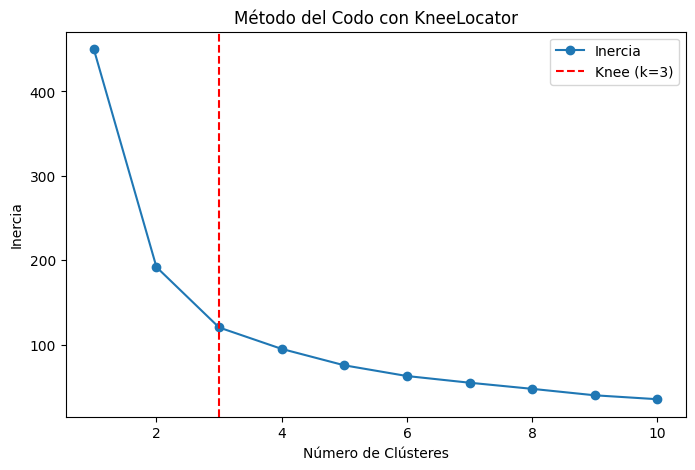

El número óptimo de clusters encontrado por kneed es: 3


In [ ]:
from kneed import KneeLocator
import numpy as np
from sklearn.cluster import KMeans

# Crear una lista de inercia para diferentes valores de k
K_range = range(1, 11)
inertias = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Utilizar KneeLocator para encontrar el punto óptimo
knee_locator = KneeLocator(K_range, inertias, curve="convex", direction="decreasing")
optimal_k = knee_locator.knee

# Graficar la curva con el punto óptimo marcado
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o', label="Inercia")
plt.axvline(optimal_k, linestyle="--", color="red", label=f"Knee (k={optimal_k})")
plt.xlabel("Número de Clústeres")
plt.ylabel("Inercia")
plt.title("Método del Codo con KneeLocator")
plt.legend()
plt.show()

print(f"El número óptimo de clusters encontrado por kneed es: {optimal_k}")


**Interpretación del gráfico:**

kneed ha detectado que el número óptimo de clústeres es k=3.

*   Esto coincide con el método del codo manual, donde también se observaba el codo en k=3.
*   La curva de inercia muestra una fuerte caída hasta k=3, después de lo cual la reducción de inercia se desacelera, lo que confirma que 3 clústeres es el número ideal.
*   Esto coincide con el método del codo manual, donde también se observaba el codo en k=3.




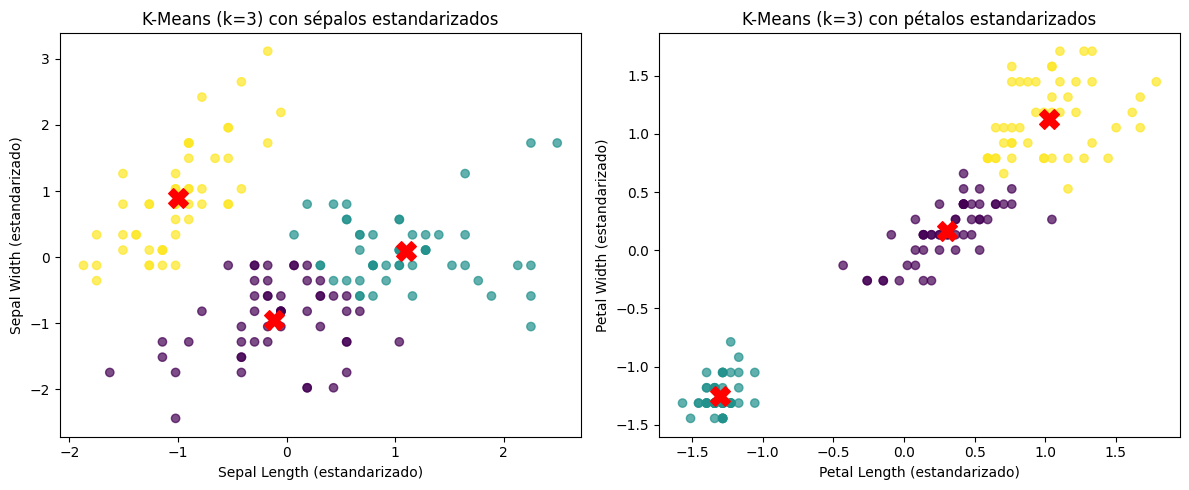

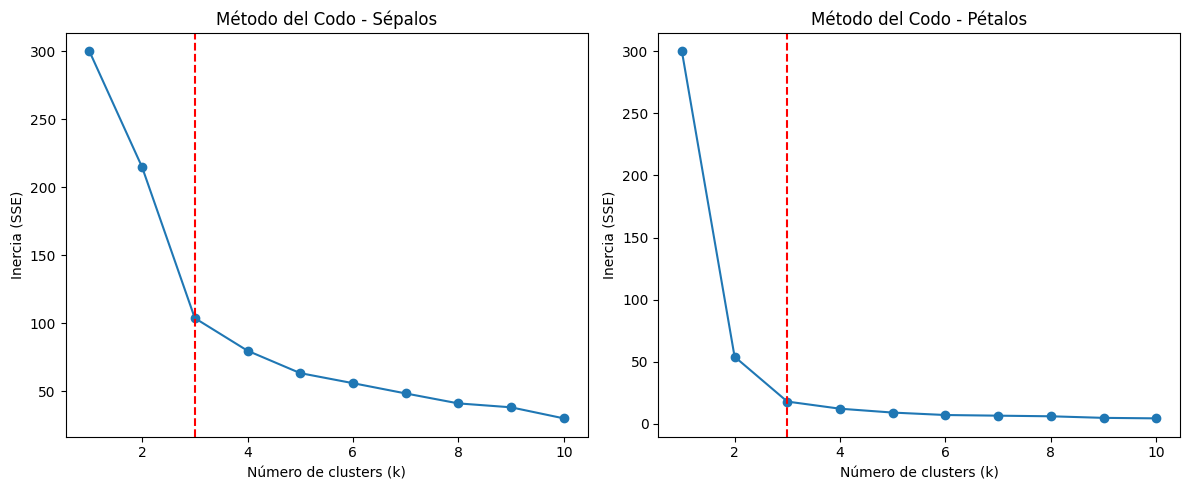

K óptimo para sépalos: 3
K óptimo para pétalos: 3


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

# 1. Cargar el dataset
iris = pd.read_csv("iris.csv")

# 2. Separar los datos en sépalos y pétalos
X_sepal = iris[['sepal_length', 'sepal_width']]
X_petal = iris[['petal_length', 'petal_width']]

# 3. Estandarizar los datos
scaler_sepal = StandardScaler()
X_sepal_scaled = scaler_sepal.fit_transform(X_sepal)

scaler_petal = StandardScaler()
X_petal_scaled = scaler_petal.fit_transform(X_petal)

# 4. Método del codo para determinar k óptimo
def find_optimal_k(X):
    inertias = []
    k_range = range(1, 11)

    for k in k_range:
        km = KMeans(n_clusters=k, random_state=0)
        km.fit(X)
        inertias.append(km.inertia_)

    # Usar kneed para detectar el "codo"
    kneedle = KneeLocator(k_range, inertias, curve="convex", direction="decreasing")
    return kneedle.knee, k_range, inertias

k_sepal, k_range_sepal, inertias_sepal = find_optimal_k(X_sepal_scaled)
k_petal, k_range_petal, inertias_petal = find_optimal_k(X_petal_scaled)

# 5. Aplicar K-Means con k=3 (porque el método del codo nos da usualmente k=3)
kmeans_sepal = KMeans(n_clusters=3, random_state=0)
labels_sepal = kmeans_sepal.fit_predict(X_sepal_scaled)

kmeans_petal = KMeans(n_clusters=3, random_state=0)
labels_petal = kmeans_petal.fit_predict(X_petal_scaled)

# 6. Graficar los resultados
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Sépalos
axes[0].scatter(X_sepal_scaled[:, 0], X_sepal_scaled[:, 1], c=labels_sepal, cmap='viridis', alpha=0.7)
axes[0].scatter(kmeans_sepal.cluster_centers_[:, 0], kmeans_sepal.cluster_centers_[:, 1], c='red', s=200, marker='X')
axes[0].set_title('K-Means (k=3) con sépalos estandarizados')
axes[0].set_xlabel('Sepal Length (estandarizado)')
axes[0].set_ylabel('Sepal Width (estandarizado)')

# Pétalos
axes[1].scatter(X_petal_scaled[:, 0], X_petal_scaled[:, 1], c=labels_petal, cmap='viridis', alpha=0.7)
axes[1].scatter(kmeans_petal.cluster_centers_[:, 0], kmeans_petal.cluster_centers_[:, 1], c='red', s=200, marker='X')
axes[1].set_title('K-Means (k=3) con pétalos estandarizados')
axes[1].set_xlabel('Petal Length (estandarizado)')
axes[1].set_ylabel('Petal Width (estandarizado)')

plt.tight_layout()
plt.show()

# 7. Graficar el método del codo para ambas variables
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(k_range_sepal, inertias_sepal, marker='o')
axes[0].axvline(k_sepal, linestyle='dashed', color='red')
axes[0].set_title("Método del Codo - Sépalos")
axes[0].set_xlabel("Número de clusters (k)")
axes[0].set_ylabel("Inercia (SSE)")

axes[1].plot(k_range_petal, inertias_petal, marker='o')
axes[1].axvline(k_petal, linestyle='dashed', color='red')
axes[1].set_title("Método del Codo - Pétalos")
axes[1].set_xlabel("Número de clusters (k)")
axes[1].set_ylabel("Inercia (SSE)")

plt.tight_layout()
plt.show()

# 8. Imprimir los valores de k óptimos
print(f"K óptimo para sépalos: {k_sepal}")
print(f"K óptimo para pétalos: {k_petal}")

En el análisis realizado, se observó que las características de los pétalos (longitud y ancho) son significativamente más efectivas para separar las especies de Iris en comparación con las características de los sépalos. Esto se evidencia en la clara separación entre los clusters en las gráficas de pétalos, mientras que los datos de sépalos muestran una mayor superposición entre grupos, dificultando la distinción. Tanto el método del codo manual como el uso de la librería kneed confirmaron que el número óptimo de clusters es
𝑘
=
3
k=3, lo cual coincide con las tres especies presentes en los datos reales (setosa, versicolor y virginica). Este resultado subraya la importancia de seleccionar las variables más relevantes al realizar análisis de clustering, ya que las características de los pétalos permiten una clasificación más precisa y consistente de las especies de Iris.

# **PREGUNTAS DE BONIFICACIÓN**

📌 **¿A qué podría deberse la diferencia, si la hay?**

En este caso, no hay diferencia, ya que tanto el método del codo manual como kneed detectaron k=3 como el número óptimo. Pero en otros escenarios, las diferencias podrían deberse a:

Variaciones en la distribución de los datos.
El criterio que usa kneed para detectar el "codo" automáticamente.
Posibles valores atípicos que afecten la inercia en ciertos k.

📌 **¿El número detectado es correcto en comparación con los datos reales?**

Sí, es correcto porque que el dataset Iris tiene tres especies reales (setosa, versicolor, virginica), por lo que k=3 es la mejor elección. Cuando usamos k=2, no se logra diferenciar correctamente todas las especies, pero con k=3, las tres especies pueden agruparse correctamente.

📌 ¿A qué conclusiones llegaron?

El método del codo manual y kneed coinciden en k=3.
k=3 es la mejor elección porque el dataset tiene tres especies reales.
La forma del pétalo permite una mejor segmentación en comparación con el sépalo.
K-Means con k=3 es suficiente para una buena clasificación en este dataset.
Para mejorar aún más la precisión, podríamos evaluar métricas como Silhouette Score o probar algoritmos más avanzados (como DBSCAN o Gaussian Mixture Models).

